# MATH&ML-8 Алгоритмы на основе деревьев решений.
###  Содержание <a class="anchor" id=0></a>

- [1. Введение](#1)
- [2. Деревья решений (регрессия и классификация)](#2)
- [3. Алгоритм CART. Параметры](#3)
- [4. Алгоритм CART. Неоднородность](#4)
- [5. Алгоритм CART. Рекурсия](#5)
- [6. Алгоритм CART. Значимость](#6)
- [7. Деревья решений. Практика](#7)
- [8. Итоги](#8)

# 1. Введение <a class="anchor" id=1></a>

[к содержанию](#0)

<img src=m8_img1.png width=600>

# 2. Деревья решений (регрессия и классификация) <a class="anchor" id=2></a>

[к содержанию](#0)

У нас есть набор из 500 объектов, которые описываются пятью какими-то характеристиками. Например, это могут быть 500 пациентов, у которых измерили пять медицинских параметров: вес, рост, давление, количество лейкоцитов в крови и уровень сахара.

В паре с объектом всегда идёт целевая переменная, которую необходимо научиться предсказывать. Например, целевой переменной может быть признак болезни: 1 — болен диабетом, 0 — не болен диабетом.

Наша цель — построить модель машинного обучения, которая на основе характеристик объекта предсказывает целевую переменную. Для нашего примера это будет модель, которая на основе медицинских параметров выдаёт свой прогноз о наличии у пациента диабета.

Это была классическая постановка задачи машинного обучения в свободной форме. Давайте теперь посмотрим, как будет выглядеть та же самая задача на языке математики.

>Примечание. Далее для простоты изложения и упрощения обозначений мы не будем писать стрелки над векторами. Если какая-то переменная будет являться векторной, мы будем указывать на это в явном виде.
>
>Постановка задачи машинного обучения может выглядеть по-разному. Например, когда мы разбирали линейные модели в модулях по линейной алгебре, мы давали постановку задачи на языке линейной алгебры. От нас требовалось линейно выразить целевой вектор $y$ через векторы-факторы $x_j$. 
>
>В контексте разговора о деревьях нам будет удобнее использовать не чистый аппарат линейной алгебры, а совместить его с теорией множеств.

Пусть задано обучающее множество пар объектов и ответов к ним $Q=\{(x,\ y)\}$, где $x\ \in \ X$ — векторы из $\mathbb{R}^M$, описываемые $M$ координатами (признаками), $y\ \in \ Y$ — целевая метка объекта, $|Q|=N$. Множество $Y$ может быть непрерывным (задача регрессии) с мощность $|Y|=N$ или дискретным (задача классификации) с мощностью $|Y|=K$, где $K$ — количество классов.

В примере выше:

* $x = (x_1, x_2, x_3, x_4, x_5) — один отдельный пациент;
* $x_j$ — признак (фактор), описывающий его;
* $X$ — множество всех пациентов;
* $N=500$ — количество пациентов;
* $M=5$ — количество признаков, описывающих пациентов;
* $Y={0,1}$ — множество уникальных классов объектов;
* $K=2$ — количество классов (мощность множества $Y$).

**Наша цель** — составить такую функцию/модель $f(x)$, которая наилучшим образом определяет зависимость между векторами $x$ из множества $X$ и целевой переменной $y$ из множества $Y$ — $f:X\rightarrow Y$.

Строго говоря, такую функцию мы будем искать не в аналитическом виде, как мы делали, например, в случае линейной регрессии, а в виде алгоритма, то есть в виде последовательности действий. Обычно в математике алгоритм обозначается как $a(x)$ или $a:X \rightarrow Y$.

Алгоритм $a(x)$ мы будем искать в семействе деревьев решений.

## ОПРЕДЕЛЕНИЕ РЕШАЮЩЕГО ДЕРЕВА

>Если говорить простыми словами, **обученное дерево решений** — это последовательность вопросов, которые задаются поступающим на его вход объектам.

В зависимости от того, выполняется ли заданное в вопросе условие, объект переходит к одному из следующих вопросов, и так происходит до тех пор, пока не будет получен конечный результат — прогноз дерева решений для данного объекта. Всё это очень напоминает стандартные рассуждения по принципу `«если…, то»`.

Пройдя путь, который зависит от характеристик объекта, через последовательность от первого вопроса (корня дерева) до финального ответа (листа) мы можем определить значение целевой переменной. В задаче регрессии финальный ответ дерева — некоторое число, а в задаче классификации — класс объекта.

<img src=m8_img2.png width=600>

Давайте переведём вышесказанное на более формальный язык математики, на котором, собственно, и работает программная реализация дерева решений.

>Дерево решений представляет собой последовательность условий вида $x_j \leq t$, которые называются **предикатами**, или **решающими правилами**.

Формально сами предикаты в вершинах мы ранее обозначали как:

$B_{\nu }(x_j,\ t)\ =\ I[x_j\le t],$

где $v$ — номер вершины графа, а $I$ с квадратными скобками $[]$ — обозначение индикаторной функции (она равна $1$ (`True`), если условие внутри скобок выполняется, и $0$ (`False`) — в противном случае).

>**Примечание**. Далее для удобства мы будем обозначать индикаторную функцию $I$ простыми квадратными скобками, например:

$B_{\nu }(x_j,\ t)\ =\ [x_j\le t]$

Каждый предикат разделяет множество объектов $X$ на два подмножества:

* левое — множество тех объектов, для которых заданное в предикате условие выполняется: $X^{left}=\{x\ |\ x_j\le t\}$;
* правое — множество тех объектов, для которых условие ложно: $X^{right} = X \backslash X^{left} = \{x \mid x_j > t \}$.

Последовательность предикатов лучше всего представлять в виде **ациклического связного графа**. 

Давайте посмотрим на пример такого графа для дерева решений глубиной 4. Дерево решает задачу классификации 15 наблюдений (мощность множества $X$) на три класса (мощность множества $Y$):

<img src=m8_img3.png width=600>

>Примечание. Информация, указанная в вершинах графа, определяется во время обучения дерева решений, о процедуре которого мы поговорим в следующих юнитах:
>
>$x_j\le t$ — условие предиката;
>$gini$ — значение критерия информативности (в данном случае используется критерий Джини);
>$samples$ — число объектов из обучающей выборки, попавших в вершину;
>$value$ — число объектов каждого из классов из обучающей выборки, попавших в вершину.

В построенном графе выделяют $три типа вершин$:

* корневая вершина (root node) — то, откуда всё начинается;
* внутренние вершины (intermediate nodes);
* листья (leafs) — конечные вершины дерева, в которых определяется конечный «ответ» — прогноз дерева решений.

<img src=m8_img4.png width=600>

Вершины графа группируются в уровни, которые называются **глубиной дерева (depth)**. Отсчёт уровней ведётся с 0 (то есть корневая вершина не считается при подсчёте глубины дерева).

>Корневая и внутренние вершины содержат предикаты $B_{\nu }(x_j,\ t)$, на основе которых организуется движение по графу. В ходе предсказания осуществляется проход по дереву к некоторому листу. Для каждого объекта из выборки движение начинается из корня.

В вершине $v$ проход осуществляется влево, если для объекта $x$ условие, записанное в предикате, выполняется, то есть $B_{\nu }(x_j,\ t)=1$, и вправо, если условие является для объекта #x# ложным, то есть $B_{\nu }(x_j,\ t)=0$. Проход продолжается до момента, пока будет достигнут некоторый лист. Ответом алгоритма для объекта $x$ считается прогноз $\hat{y}=a(x)$, приписанный этому листу.

| Регрессия | Классификация|
| - | - |
| В задаче **регрессии** прогноз целевой переменной $\hat{y}$ будет определяться принципом усреднения, то есть объекту $x$ в качестве прогноза присваивается среднее (или медианное) значение целевой переменной по объектам, попавшим в лист на этапе обучения дерева. | В задаче **классификации** прогноз целевой переменной $\hat{y}$ будет определяться принципом голосования большинства, то есть объекту $x$ присваивается самый популярный класс объектов, попавших в лист на этапе обучения дерева. |

# 3. Алгоритм CART. Параметры <a class="anchor" id=3></a>

[к содержанию](#0)

Схематично поэтапное построение дерева решений выглядит следующим образом:

| Картинка | Описание |
| - | - |
| <img src=m8_img5.png>  |  Допустим, мы построили решающий пень. В результате построения получилась одна родительская и две дочерние вершины, каждой из которых соответствует своя часть исходной выборки. |
| <img src=m8_img6.png>  |  Чтобы построить следующий уровень дерева, необходимо проделать ту же процедуру построения решающего пня, но теперь уже каждая из дочерних вершин воспринимается как родительская, и её основе строится новый решающий пень. В результате получится дерево глубиной 2. |
| <img src=m8_img7.png>  |  Строим следующий уровень: дочерние вершины снова воспринимаем как родительские и на их основе строим новые решающие пни. Получаем дерево глубиной 3.  Повторяем эти действия, пока не дойдём до некоторого предела, на котором нужно будет остановиться: например, если мы достигли идеальной однородности (все объекты относятся к одному классу). |

  /

>**Примечание**. Формально такой последовательный алгоритм построения дерева относится к категории жадных алгоритмов. 

Внимательные студенты уже догадались, что описанная нами процедура построения дерева является рекурсией. Мы рекурсивно используем алгоритм построения решающего пня для каждой из дочерних вершин, тем самым создавая всё новые и новые вершины графа.

Теперь давайте переведём наши рассуждения на язык математики и сформулируем итоговый алгоритм построения дерева.

>**Примечание**. Отметим, что, так как мы теперь рассматриваем не решающие пни, а деревья произвольной глубины, то в наших рассуждениях появится **индекс вершины дерева** $v$. Он вводится для того, чтобы обозначить, что та или иная величина рассчитывается для конкретной вершины.

Итак, пусть $Q_v={(x,y)}$ — множество объектов и ответов к ним, попавших в вершину с номером $v$, $N_v=|Q_v|$. Пусть задан критерий информативности $H(Q)$, который зависит от задачи (регрессия — `Squared Error`, `Absolute Error` или `Poisson Error`, классификация — `Gini` или `Entropy`). Также задан некоторый критерий остановки рекурсии $stop \ criterion(Q_v)$. О том, какими могут быть критерии остановки, мы поговорим чуть позже.

Наш **алгоритм построения дерева решений `CART`** будет выглядеть следующим образом:

1. Создаём вершину под номером $v$.

2. По умолчанию ветвление дерева решений прекращается, когда достигается однородность, то есть $H(Q)=0$. 

    **2.1.  Если условие остановки выполнено.**
    Формируем листовую вершину $v$ и ставим в соответствие этому листу ответ, который будет выдаваться для новых объектов, которые дойдут до этого листа. Назовём эту часть `create_leaf()`.
    
    * В случае задачи регрессии ответ вычисляется как среднее (если критерий информативности $H(Q)$ — `Squared Error` или `Poisson Error`) или медиана (если критерий информативности — `Absolute Error`):

    $${\hat{y}}_v=\frac{1}{N_v}\sum_{y\ \in \ Q_v}{}y$$

    $${\hat{y}}_v=median_{y\ \in \ Q_v}(y)$$

    * В случае задачи классификации ответ вычисляется как метка самого популярного среди объектов $X_v$ класса или как оценки вероятностей принадлежности $P_{vk}$ к каждому из классов:

    $$P_{vk}=\frac{1}{N_v}\sum_{y\ \in \ Y_v}{}[y=k]$$

    $${\hat{y}}_v=argmax_{k\in K}(P_{vk})$$

    **2.2. Если условие остановки не выполнено.**

    Строим решающий пень. Формируем решающее правило $B_{v}(x_j,\ t)$ для вершины $v$. Из возможных комбинаций $w=(j, t)$ выбираем такую, которая определяет наилучшее разбиение текущего множества объектов и ответов к ним $Q_v$ на две части: $Q^{left}=\{(x, y)|x_j\leq t\}$ — левую, для которой условие предиката истинно, и $Q^{right}_v=\{(x,\ y) \mid \ x_j >t\}$ — правую, для которой условие предиката ложно:

    $$G(Q,\ w)=\frac{N^{left}_v}{N_v}H(Q^{left}_v)+\frac{N^{right}_v}{N_v}H(Q^{right}_v)$$

    $$w_{opt}=(j_{opt},\ t_{opt})=argmin_w\ G(Q,\ w)$$

    $$B_{\nu }(x_j,\ t)=[x_{j_{opt}}\le t_{opt}]$$

    Эту часть алгоритма мы обозначали ранее как `best_split()`.

    В результате разбиения будут созданы два подмножества объектов — $Q^{left}_v$ и $Q^{rigth}_v$. На основе этих подмножеств мы с помощью рекурсии создадим две новые вершины дерева (левую и правую) и свяжем их с текущей вершиной.

    Для выборок $Q^{left}_v$ и $Q^{rigth}_v$ процедура будет повторяться рекурсивно, пока не выполнится критерий остановки.

3. Возвращаем созданную вершину.

## Файл `DecisionTree_CART.ipynb`

# 4. Алгоритм CART. Неоднородность <a class="anchor" id=4></a>

[к содержанию](#0)

### КРИТЕРИИ ИНФОРМАТИВНОСТИ В ЗАДАЧЕ РЕГРЕССИИ

**1. КВАДРАТИЧНАЯ ОШИБКА (SQUARED ERROR)**

В задачах регрессии классической функцией ошибки выступает средний квадрат разницы между истинным ответом $y$ и предсказанием модели $\hat{y}$, или среднеквадратичная ошибка (MSE, Mean Squared Error). Давайте возьмём её в качестве критерия информативности:

$H(Q)=\frac{1}{N}\sum_{y\in \ Q}{}(y-\hat{y})^2$

Ранее мы говорили, что в качестве предсказания $\hat{y}$ модели дерева решений в задачах регрессии вычисляется среднее значение целевой переменной для объектов, попавших в вершину. Обозначаем эту величину как $\overline{y}$:

${\hat{y}=\overline{y}}=\frac{1}{N}\sum_{y\in \ Q}{}y$

Тогда, подставив значение $\hat{y}$ в формулу, получим:

$H(Q)=\frac{1}{N}\sum_{y\in \ Q}{}(y-\overline{y})^2$

Если присмотреться внимательно, можно заметить, что полученная формула — это формула выборочной дисперсии целевой переменной, т. е. $H(Q)=D(y)$. Таким образом, используя критерий MSE, мы выбираем параметры сплита $w$ так, чтобы взвешенная сумма дисперсий в листьях была как можно меньше, что кажется вполне логичным.

**2. АБСОЛЮТНАЯ ОШИБКА (ABSOLUTE ERROR)**

Вместо квадрата используем модуль разницы между истиной и предсказанием — получим среднюю абсолютную ошибку (MAE, Mean Absolute Error):

$H(Q)=\frac{1}{N}\sum_{y\in \ Q}{}\left|y-\hat{y} \right|$

Однако в таком случае в качестве предсказания $\hat{y}$ модели дерева решений вычисляется медиана целевой переменной для объектов, попавших в корневую вершину.

$H(Q)=\frac{1}{N}\sum_{y\in \ Q}{}\left|y-median(y) \right|$

Таким образом, данный критерий информативности измеряет отклонение целевой переменной от медианы.

**3. ПУАССОНОВСКАЯ ОШИБКА (POISSON ERROR)**

Последний критерий, предусмотренный в `sklearn`, — пуассоновская ошибка. Данный критерий используется редко, но он будет хорошим выбором в задачах, где целевая переменная дискретная и подчинена распределению Пуассона (например, количество отказов оборудования).

Формула выводится из распределения Пуассона с помощью [метода максимального правдоподобия](https://ru.wikipedia.org/wiki/Метод_максимального_правдоподобия). Мы опустим саму процедуру вывода и приведём только конечный вид критерия информативности:

$H(Q)=\frac{1}{N}\sum_{y\in \ Q}{}(y\ log(\frac{y}{\overline{y}})-y+\overline{y})$

In [8]:
# Задание 4.3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree

ames_data = pd.read_csv('AmesHousing.zip')

ames_data = ames_data[(ames_data["Lot Frontage"] <=150) & (ames_data["Lot Area"] <=20000)]

ames_sample = ames_data[["Lot Frontage", "Lot Area", "SalePrice"]].sample(
    n=15, random_state=42, ignore_index=True
)

X = ames_sample[["Lot Frontage", "Lot Area"]]
y = ames_sample["SalePrice"]

In [4]:
def find_candidates_for_thresholds(x, y):
    x = x.sort_values().drop_duplicates()
    x_roll_mean = x.rolling(2).mean().dropna()
    y = y[x_roll_mean.index]
    y_roll_mean = y.diff()
    candidates = x_roll_mean[y_roll_mean != 0]
    return candidates.values

def squared_error(y):
    y_pred = y.mean()
    return ((y - y_pred) ** 2).mean()

def split(X, y, split_params):
    j, t = split_params
    predicat = X.iloc[:, j] <= t
    X_left, y_left = X[predicat], y[predicat]
    X_right, y_right = X[~predicat], y[~predicat]
    return X_left, y_left, X_right, y_right

def calculate_weighted_impurity(X, y, split_params, criterion):
    X_left, y_left, X_right, y_right = split(X, y, split_params)
    N, N_left, N_right  = y.size, y_left.size, y_right.size
    score = N_left / N * criterion(y_left) + N_right / N * criterion(y_right)
    return score

def best_split(X, y, criterion):
    M = X.shape[1]
    min_weighted_impurity = np.inf
    optimal_split_params = None
    for j in range(M):
        thresholds = find_candidates_for_thresholds(X.iloc[:, j], y)
        for t in thresholds:
            split_params = (j, t)
            weighted_impurity = calculate_weighted_impurity(X, y, split_params, criterion)
            if weighted_impurity < min_weighted_impurity:
                min_weighted_impurity = weighted_impurity
                optimal_split_params = split_params
    return optimal_split_params

In [9]:
optimal_split_params = best_split(X, y, criterion=squared_error)
print('Optimal j: {}'.format(optimal_split_params[0]))
print('Optimal t: {}'.format(optimal_split_params[1]))

Optimal j: 0
Optimal t: 71.0


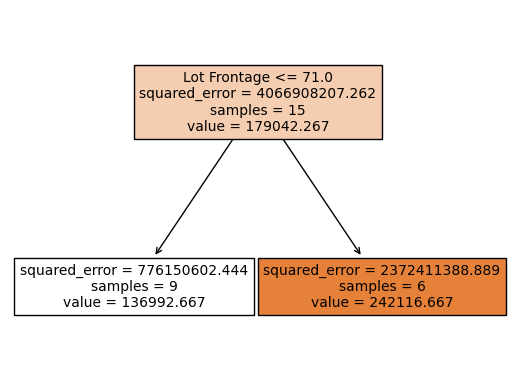

In [10]:
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем ее
dt = tree.DecisionTreeRegressor(
    max_depth=1, #глубина
    criterion='squared_error', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X, y)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

***

### КРИТЕРИИ ИНФОРМАТИВНОСТИ В ЗАДАЧЕ КЛАССИФИКАЦИИ

**1. ЭНТРОПИЯ ШЕННОНА (ENTROPY)**

Первый критерий, который мы рассмотрим, — это энтропия Шеннона. Она измеряет непредсказуемость реализации случайной величины.

$H(Q)=-\sum^K_{k=1}{}P_klog(P_k)$

Основание логарифма $log$ на самом деле не имеет значения, но традиционно используется логарифм по основанию  $2(log_2)$.

Данную метрику Шеннон вывел, занимаясь вопросами кодирования строк. Однако затем выяснилось, что полученная формула очень хорошо подходит теории случайных величин. Энтропия численно отражает меру хаоса и активно используется во многих прикладных задачах — от шифрования до машинного обучения.

**2. КРИТЕРИЙ ДЖИНИ (GINI)**

Другой способ вычислить неоднородность в случае задачи классификации — воспользоваться критерием информативности Джини:

$H(Q)=\sum^K_{k=1}{}P_k(1-P_k)$

In [11]:
def entropy(y):
    p = y.value_counts(normalize=True)
    entropy = -np.sum(p * np.log2(p))
    return entropy

In [12]:
optimal_params = best_split(X, y, criterion=entropy)

In [14]:
bill_data = pd.read_csv('bill_authentication.csv')
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15, 
    random_state=42, 
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

In [15]:
optimal_split_params = best_split(X, y, criterion=entropy)
print('Optimal j: {}'.format(optimal_split_params[0]))
print('Optimal t: {}'.format(optimal_split_params[1]))

Optimal j: 1
Optimal t: 3.22085


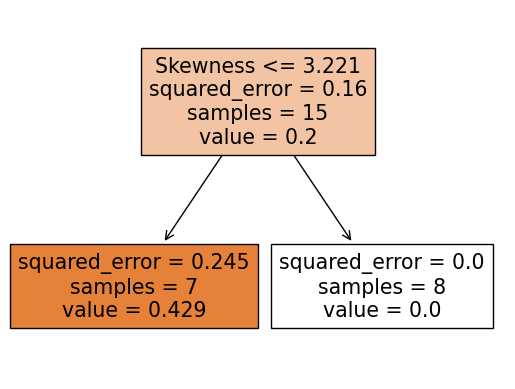

In [17]:
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем ее
dt = tree.DecisionTreeRegressor(
    max_depth=1, #глубина
    criterion='squared_error', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X, y)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

# 5. Алгоритм CART. Рекурсия <a class="anchor" id=5></a>

[к содержанию](#0)

Для начала создадим вспомогательный класс вершины. У него будут следующие атрибуты:

* `left` — ссылка на левого потомка;
* `right` — ссылка на правого потомка;
* `value` — ответ алгоритма;
* `split_params` — параметры разбиения (сплита);
* `impurity` — неоднородность в вершине (пригодится для расчёта важности признаков);
* `samples` — количество объектов, попавших в вершину;
* `is_leaf` — булева переменная, которая указывает, является ли вершина корневой.

In [18]:
class Node:
    def __init__(self, left=None, 
                 right=None, value=None, 
                 split_params=None, impurity=None,
                 samples=None, is_leaf=False):
        self.left = left
        self.right = right
        self.split_params = split_params
        self.value = value
        self.impurity = impurity
        self.samples = samples
        self.is_leaf = is_leaf

In [20]:
def create_leaf_prediction(y):
    value = y.mode()[0]
    return value

def stopping_criterion(X, y, criterion):
    return criterion(y) == 0

def build_decision_tree(X, y, criterion):
    if stopping_criterion(X, y, criterion):
        value = create_leaf_prediction(y)
        node = Node(
            value=value, 
            impurity=criterion(y), 
            samples=y.size,
            is_leaf=True
        )
    else:
        split_params = best_split(X, y, criterion=criterion)
        X_left, y_left, X_right, y_right = split(X, y, split_params)
        left = build_decision_tree(X_left, y_left, criterion)
        right = build_decision_tree(X_right, y_right, criterion)       
        node = Node(
            left=left, right=right, 
            split_params=split_params, 
            impurity=criterion(y), 
            samples=y.size
        )
    
    return node

def print_decision_tree(node, depth=0):
    depth += 1
    if node.is_leaf:
        print('   ' * depth, 'class: {}'.format(node.value))
    else:
        print('   ' * depth, 'feature_{} <= {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.left, depth=depth)
        print('   ' * depth, 'feature_{} > {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.right, depth=depth)

In [22]:
# Объявляем функцию для вычисления энтропии
def entropy(y):
    p = y.value_counts(normalize=True)
    entropy = -np.sum(p * np.log2(p))
    return entropy

# Создаём обучающую выборку
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
X = data[['age', 'income']]
y = data['loan']

# Строим дерево решений и выводим его на экран
decision_tree = build_decision_tree(X, y, criterion=entropy)
print_decision_tree(decision_tree)

    feature_0 <= 43.500:
       feature_1 <= 86.000:
          feature_0 <= 22.500:
             feature_0 <= 19.000:
                class: 1
             feature_0 > 19.000:
                class: 0
          feature_0 > 22.500:
             class: 1
       feature_1 > 86.000:
          class: 0
    feature_0 > 43.500:
       class: 0


In [23]:
# Создаём модель дерева решений
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=1000 #генератор случайных чисел
)
dt.fit(X, y)
# Выводим дерево решений на экран в виде списка условий
print(tree.export_text(decision_tree=dt))

|--- feature_0 <= 43.50
|   |--- feature_1 <= 86.00
|   |   |--- feature_0 <= 22.50
|   |   |   |--- feature_0 <= 19.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  19.00
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  22.50
|   |   |   |--- class: 1
|   |--- feature_1 >  86.00
|   |   |--- class: 0
|--- feature_0 >  43.50
|   |--- class: 0



In [24]:
def predict_sample(node, x):
    if node.is_leaf:
        return node.value
    j, t = node.split_params
    if x[j] <= t:
        return predict_sample(node.left, x)
    else:
        return predict_sample(node.right, x)

In [25]:
def predict(decision_tree, X):
    predictions = [predict_sample(decision_tree, x) for x in X.values]
    return np.array(predictions)

In [26]:
# Предсказываем целевую переменную
y_pred = predict(decision_tree, X)
print('Predictions: {}'.format(y_pred))
# Predictions: [1 0 1 0 1 0 0 1 1 0]

Predictions: [1 0 1 0 1 0 0 1 1 0]


***

**Примечание**. Конечно, алгоритм CART в sklearn реализован намного сложнее и при этом работает в десятки раз быстрее, чем наш вручную созданный алгоритм, поскольку в sklearn:

* код построения деревьев реализован на языке программирования C, что значительно повышает производительность;
* код оптимизирован разработчиками до мелочей: каждый шаг алгоритма продуман так, чтобы он выполнялся за минимальное время, а процессы, которые можно выполнять одновременно, реализованы параллельно.

Наш же пример является учебным и лишь демонстрирует, как работает введённая нами математика. При выполнении реальных задач рекомендуем вам пользоваться реализацией из sklearn.

**Примечание**. Для задачи регрессии в коде изменятся две вещи:

1. Функция `create_leaf_prediction()`. Вместо модального значения классов в листьях рассчитывается среднее значение целевой переменной:

```python
def create_leaf_prediction(y):
    value = y.mean()
    return value
```
2. Функция для расчёта критерия информативности (параметр `criterion`). В качестве критерия можно взять, например, квадратичную ошибку:

```python
def squared_error(y):
    y_pred = y.mean()
    return ((y - y_pred) ** 2).mean()
```
**Примечание**. При выполнении поиска оптимальных параметров сплита возможно возникновение такой ситуации, когда взвешенная неоднородность для двух разных наборов параметров будет одинаковой. В нашей реализации такие ситуации не учитываются: выбирается первый встретившийся вариант параметров с наименьшей взвешенной неоднородностью.

В sklearn такие случаи обрабатываются следующим образом: из всех наборов параметров разбиения, для которых неоднородность после сплита минимальна из всех возможных и при этом одинакова, случайным образом выбирается только один. Поэтому иногда деревья, полученные с помощью нашего кода, и деревья из `sklearn` могут не совпадать. Для получения этого совпадения необходимо задать параметр random_state при работе с деревьями из sklearn. Мы будем указывать это в явном виде при формулировке заданий.

In [29]:
bill_data = pd.read_csv('bill_authentication.csv')
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15, 
    random_state=42, 
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

In [30]:
# Создаём модель дерева решений
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=1000 #генератор случайных чисел
)
dt.fit(X, y)
# Выводим дерево решений на экран в виде списка условий
print(tree.export_text(decision_tree=dt))



|--- feature_1 <= 3.22
|   |--- feature_0 <= 2.76
|   |   |--- feature_0 <= -1.25
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -1.25
|   |   |   |--- feature_0 <= -0.06
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.06
|   |   |   |   |--- feature_0 <= 0.99
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  0.99
|   |   |   |   |   |--- class: 1
|   |--- feature_0 >  2.76
|   |   |--- class: 0
|--- feature_1 >  3.22
|   |--- class: 0



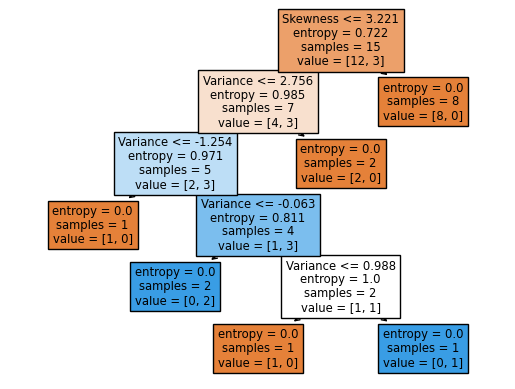

In [31]:
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

***
## КРИТЕРИИ ОСТАНОВКИ

>Как мы уже знаем, любая рекурсия всегда должна имеет критерий остановки — условие, при котором рекурсивный вызов прекращается.

### 1. ДОСТИЖЕНИЕ ОДНОРОДНОСТИ

In [32]:
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'y': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
# Создаём обучающую выборку
X = data[['age', 'income']]
y = data['y']

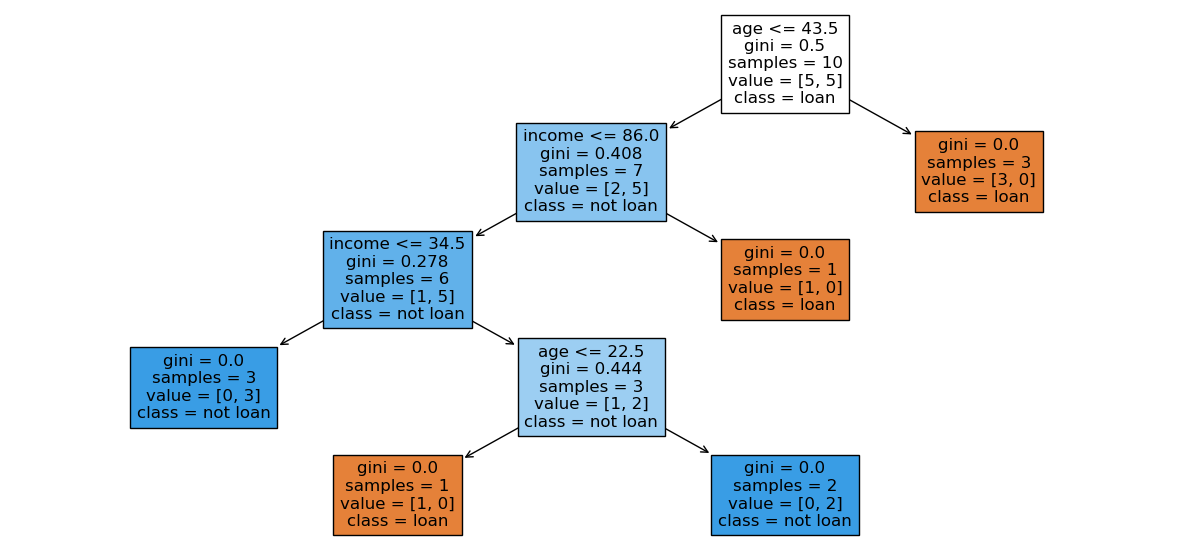

In [33]:
dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

### 2. ОГРАНИЧЕНИЕ МАКСИМАЛЬНОЙ ГЛУБИНЫ ДЕРЕВА (ПАРАМЕТР `MAX_DEPTH`)

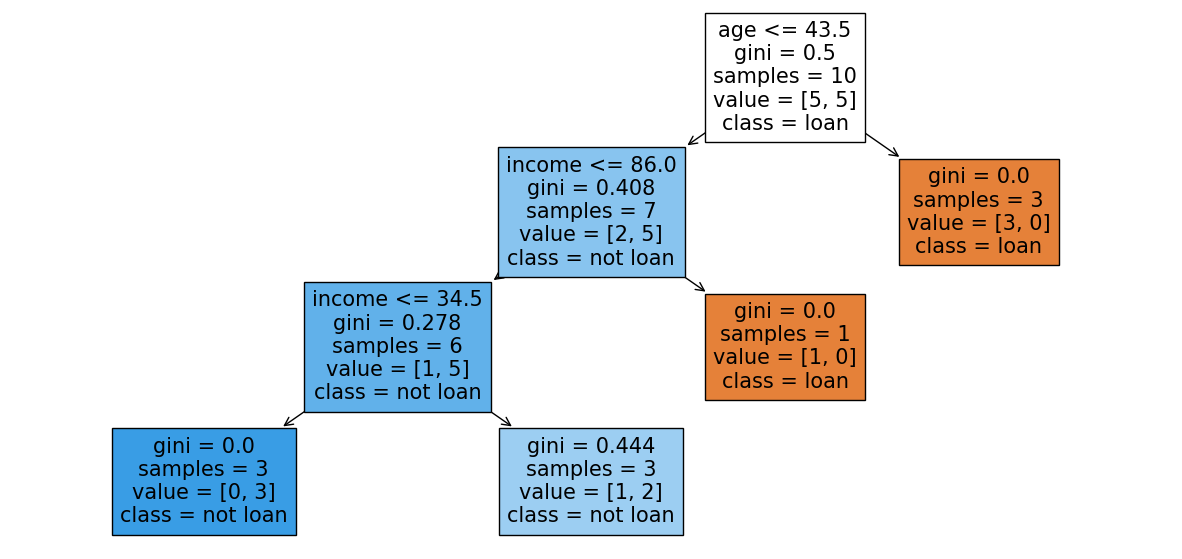

In [34]:
dt = tree.DecisionTreeClassifier(
    max_depth=3, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

### 3. ОГРАНИЧЕНИЕ МАКСИМАЛЬНОГО КОЛИЧЕСТВА ЛИСТЬЕВ В ДЕРЕВЕ (ПАРАМЕТР `MAX_LEAF_NODE`)

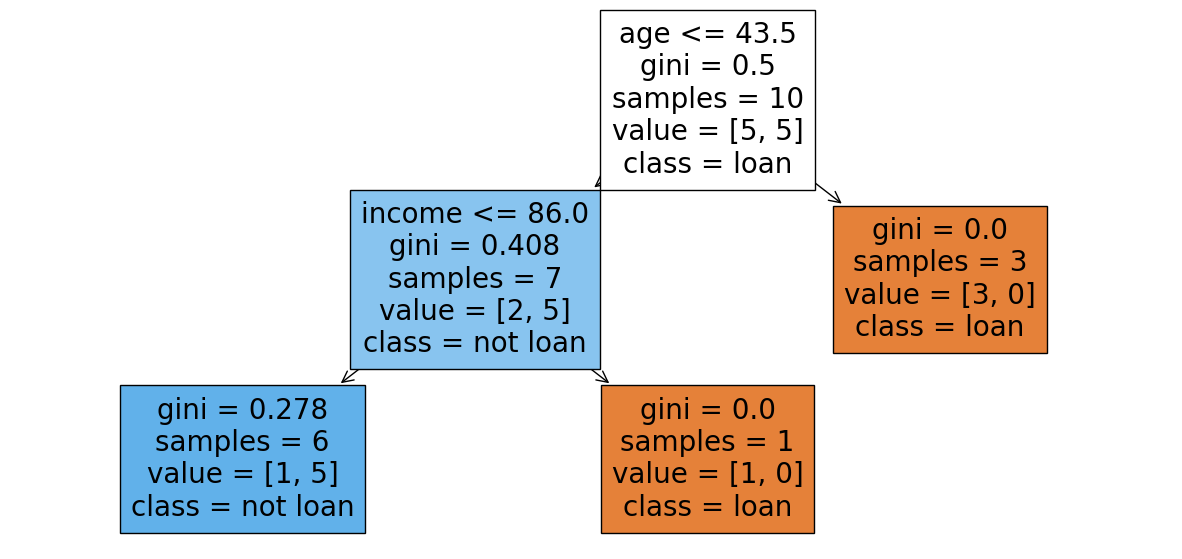

In [35]:
dt = tree.DecisionTreeClassifier(
    max_leaf_nodes=3, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

### 4. ОГРАНИЧЕНИЕ НА МИНИМАЛЬНОЕ КОЛИЧЕСТВО ОБЪЕКТОВ, ПРИ КОТОРЫХ ДОПУСКАЕТСЯ ВЕТВЛЕНИЕ ДЕРЕВА (ПАРАМЕТР `MIN_SAMPLES_SPLIT`)

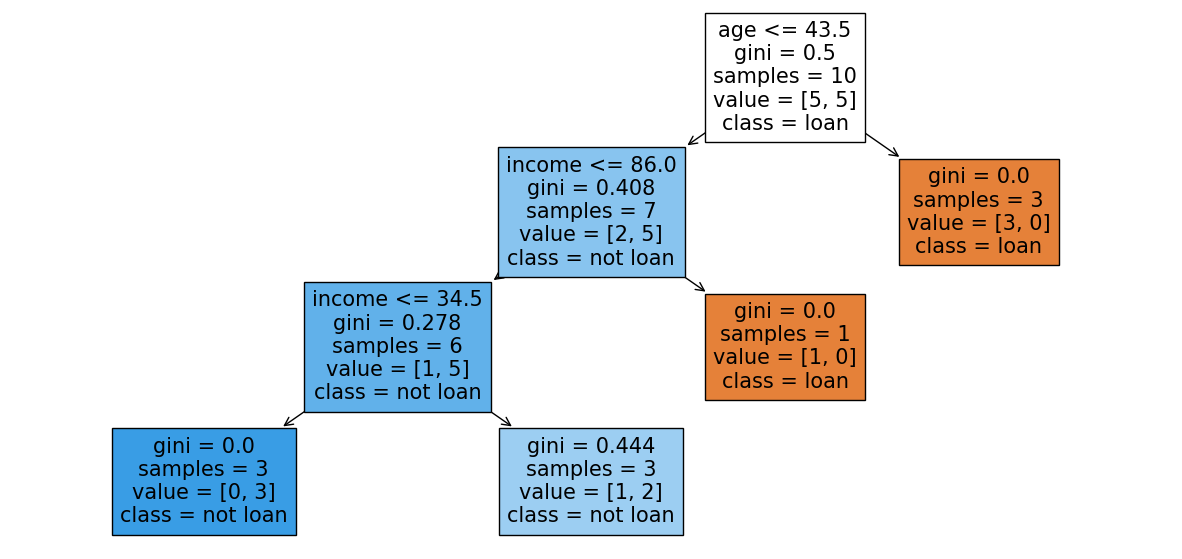

In [36]:
dt = tree.DecisionTreeClassifier(
    min_samples_split=6, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

### 5. ОГРАНИЧЕНИЕ НА МИНИМАЛЬНОЕ КОЛИЧЕСТВО ОБЪЕКТОВ, НЕОБХОДИМЫХ ДЛЯ СОЗДАНИЯ ЛИСТА (ПАРАМЕТР `MIN_SAMPLES_LEAF`)

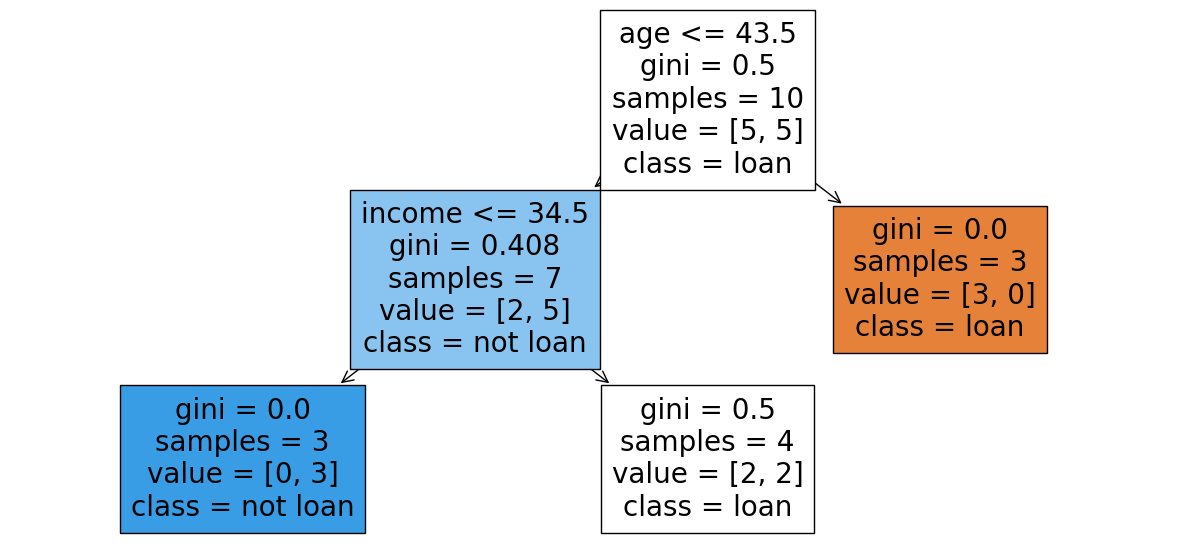

In [41]:
dt = tree.DecisionTreeClassifier(
    min_samples_leaf=3, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

In [42]:
def stopping_criterion(X, y, criterion, max_depth=None, depth=0):
    if max_depth is None:
        return (criterion(y) == 0) 
    else:
        return (criterion(y) == 0) or (depth > max_depth)
    
def build_decision_tree(X, y, criterion, max_depth=None, depth=0):
    depth += 1
    if stopping_criterion(X, y, criterion, max_depth, depth):
        value = create_leaf_prediction(y)
        node = Node(
            value=value, 
            impurity=criterion(y), 
            samples=y.size,
            is_leaf=True
        )
    else:
        split_params = best_split(X, y, criterion=entropy)
        X_left, y_left, X_right, y_right = split(X, y, split_params)
        left = build_decision_tree(X_left, y_left, criterion, max_depth, depth)
        right = build_decision_tree(X_right, y_right, criterion, max_depth, depth)       
        node = Node(
            left=left, right=right, 
            split_params=split_params, 
            impurity=criterion(y), 
            samples=y.size
        )
    return node

In [43]:
# Строим дерево решений с ограничением глубины и выводим его на экран
decision_tree = build_decision_tree(X, y, criterion=entropy, max_depth=2)
print_decision_tree(decision_tree)

    feature_0 <= 43.500:
       feature_1 <= 86.000:
          class: 1
       feature_1 > 86.000:
          class: 0
    feature_0 > 43.500:
       class: 0


# 6. Алгоритм CART. Значимость <a class="anchor" id=6></a>

[к содержанию](#0)

# 7. Деревья решений. Практика <a class="anchor" id=7></a>

[к содержанию](#0)

# 8. Итоги <a class="anchor" id=8></a>

[к содержанию](#0)